Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Specify images batch size and dimensions

In [ ]:
batch_size = 32
img_width = 28
img_height = 28

Download dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

#train_images, test_images = train_images / 255.0, test_images / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 1)),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:

epochs=20
history = model.fit(
  train_images,
  train_labels,
  validation_data=(test_images, test_labels),
  epochs=epochs,
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.7562 - loss: 0.6649 - val_accuracy: 0.8799 - val_loss: 0.3362
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.8836 - loss: 0.3149 - val_accuracy: 0.8960 - val_loss: 0.2931
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9070 - loss: 0.2540 - val_accuracy: 0.8968 - val_loss: 0.2847
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9152 - loss: 0.2259 - val_accuracy: 0.9068 - val_loss: 0.2599
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9259 - loss: 0.2034 - val_accuracy: 0.9085 - val_loss: 0.2561
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9315 - loss: 0.1814 - val_accuracy: 0.9105 - val_loss: 0.2488
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9385 - loss: 0.1654 - val_accuracy: 0.9115 - val_loss: 0.2504
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9432 -

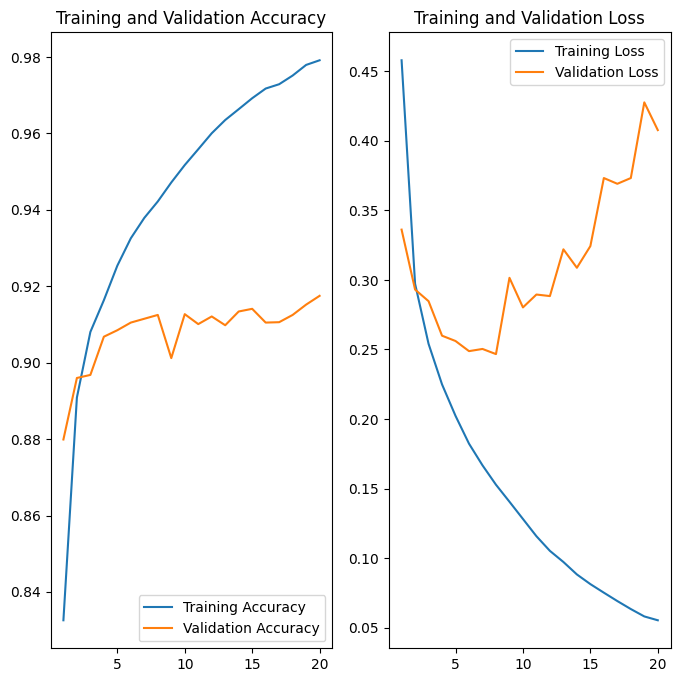

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model starts to overfit, so we will need to add some regularization to limit this.

### Strategies to limit overfitting

* Increasing training data size
* Data augmentation to increase data complexity
* Adding dropout layers
* Adding Regularization parameters (e.g. kernel_regularizer=regularizers.l2(l=0.01))
* Adding batch normalization
* Early stopping
* Simplifying the model (reducing the number of layers)

Data augmentation

In [ ]:
batch_size = 32
img_width = 28
img_height = 28

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  1)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,442 (384.54 KB)

 Trainable params: 98,442 (384.54 KB)

 Non-trainable params: 0 (0.00 B)

Compile model

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

Early Stopping

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto', restore_best_weights=True)
checkpoint = ModelCheckpoint('model_weights.h5.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

callbacks = [early_stopping, checkpoint, reduce_lr]

Train the model with data augmentation and early stopping.

In [ ]:
epochs=25
history = model.fit(
  train_images,
  train_labels,
  validation_data=(test_images, test_labels),
  epochs=epochs,
  callbacks=callbacks
)

Epoch 1/25
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6575 - loss: 0.9238
Epoch 1: val_accuracy improved from -inf to 0.77970, saving model to model_weights.h5.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 34ms/step - accuracy: 0.6576 - loss: 0.9236 - val_accuracy: 0.7797 - val_loss: 0.5968 - learning_rate: 0.0010
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8109 - loss: 0.5135
Epoch 2: val_accuracy improved from 0.77970 to 0.81410, saving model to model_weights.h5.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.8109 - loss: 0.5135 - val_accuracy: 0.8141 - val_loss: 0.5055 - learning_rate: 0.0010
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8372 - loss: 0.4357
Epoch 3: val_accuracy improved from 0.81410 to 0.84070, saving model to model_weights.h5.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 35ms/step - accuracy: 0.8372 - loss: 0.4357 - val_accuracy: 0.8407 - val_loss: 0.4505 - learning_rate: 0.0010
Epoch 4/25
1874/

Visualize training accuracy and loss

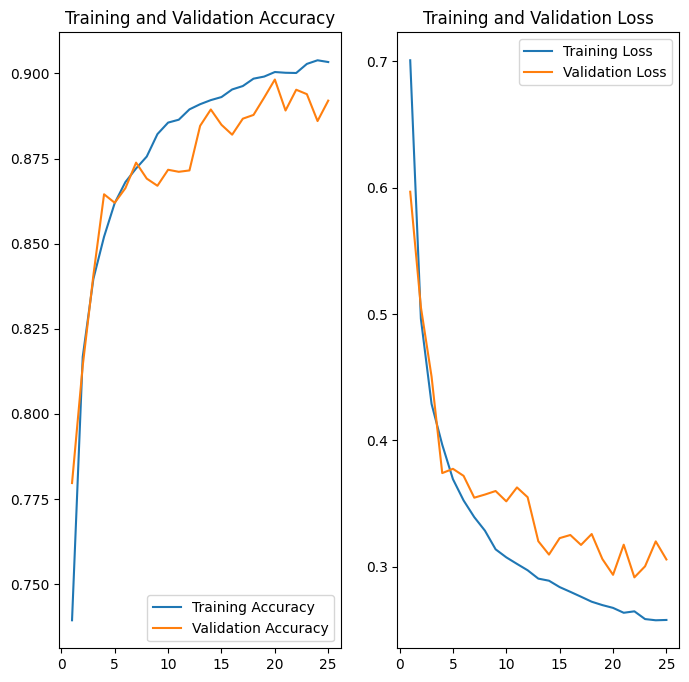

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predict image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
tf.Tensor(
[7.3698741e-01 2.4609855e-01 1.6797824e-02 8.4405610e-06 6.4307911e-05
 6.9580852e-07 4.1784067e-05 1.2982204e-12 1.0466773e-06 1.7517530e-10], shape=(10,), dtype=float32)
This image most likely belongs to T-shirt/top with a 73.70 percent confidence.


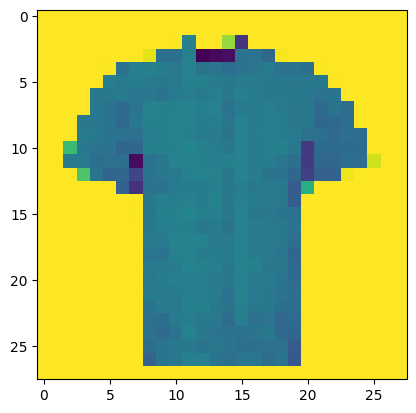

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = keras.models.load_model('model_weights.h5.keras')

img = keras.utils.load_img(
    "/content/drive/MyDrive/r1.jpg",
    target_size=(img_height, img_width),
    color_mode="grayscale")
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(score)
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)